In [4]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
import matplotlib
import pylatexenc
from qiskit.quantum_info import Statevector
from qiskit import Aer
from math import pi
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
%qiskit_version_table
from qiskit_textbook.games import hello_quantum
from qiskit_textbook.games.hello_quantum import *

In [8]:
p1 = 0.01
p3 = 3 * p1**2 * (1-p1) + p1**3 # probability of 2 or 3 errors
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a majority of the three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.01
Probability of a majority of the three replies being garbled: 0.0003


In [9]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

In [10]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [26]:
noise_model = get_noise(0.01,0.01)

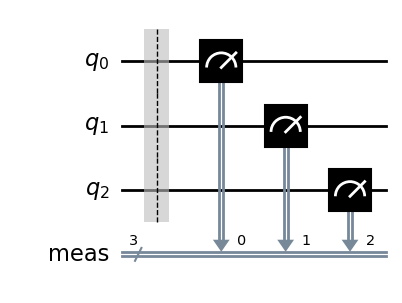

C:\Users\차현호\AppData\Local\Temp\ipykernel_21508\155693557.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()


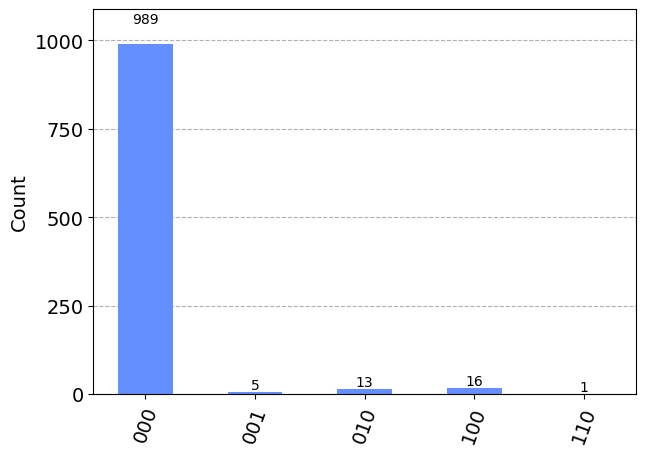

In [31]:
qc0 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc0.measure_all() # measure the qubits
display(qc0.draw(output='mpl'))

# run the circuit with the noise model and extract the counts
qobj = assemble(qc0)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

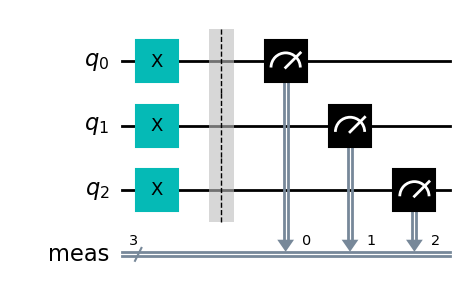

C:\Users\차현호\AppData\Local\Temp\ipykernel_21508\2885060472.py:9: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()


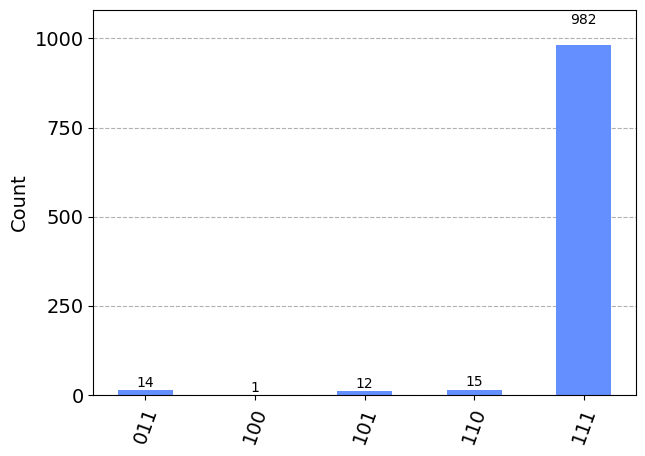

In [33]:
qc1 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc1.x([0,1,2]) # flip each 0 to 1

qc1.measure_all() # measure the qubits
display(qc1.draw(output='mpl'))

# run the circuit with th noise model and extract the counts
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

C:\Users\차현호\AppData\Local\Temp\ipykernel_21508\278872680.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()


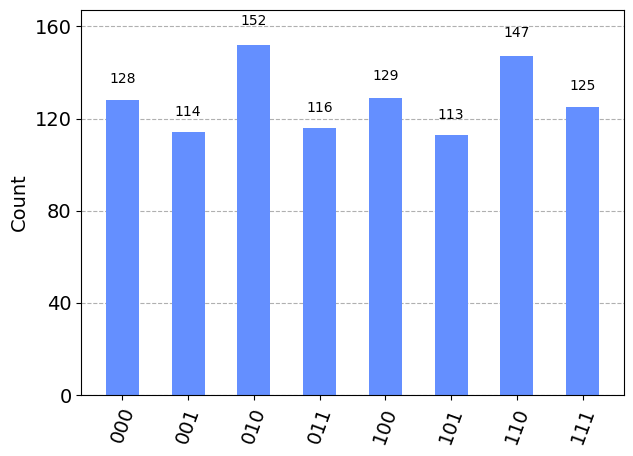

In [34]:
noise_model = get_noise(0.5,0.0)
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()
plot_histogram(counts)